In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import joypy
from PIL import Image
from io import BytesIO


gender_colormap = {"female": "hotpink", "male": "skyblue", "baseline": "green"}


df = pd.read_csv("../../processed/Claude_3_5_sonet.csv")

In [4]:
baseline = pd.read_csv("../../processed/Claude_3_5_sonet_baseline.csv")

lexical diversity
WilcoxonResult(statistic=np.float64(1291.0), pvalue=np.float64(2.364579106776181e-16))
reading difficulty
WilcoxonResult(statistic=np.float64(2874.0), pvalue=np.float64(1.1306771864963898e-06))
analytical
WilcoxonResult(statistic=np.float64(4226.0), pvalue=np.float64(0.007034221439816374))
self references
WilcoxonResult(statistic=np.float64(5369.5), pvalue=np.float64(0.5824977297908548))
certainty
WilcoxonResult(statistic=np.float64(592.5), pvalue=np.float64(3.081901896249105e-05))
emotionality
WilcoxonResult(statistic=np.float64(4836.5), pvalue=np.float64(0.12119409607957025))


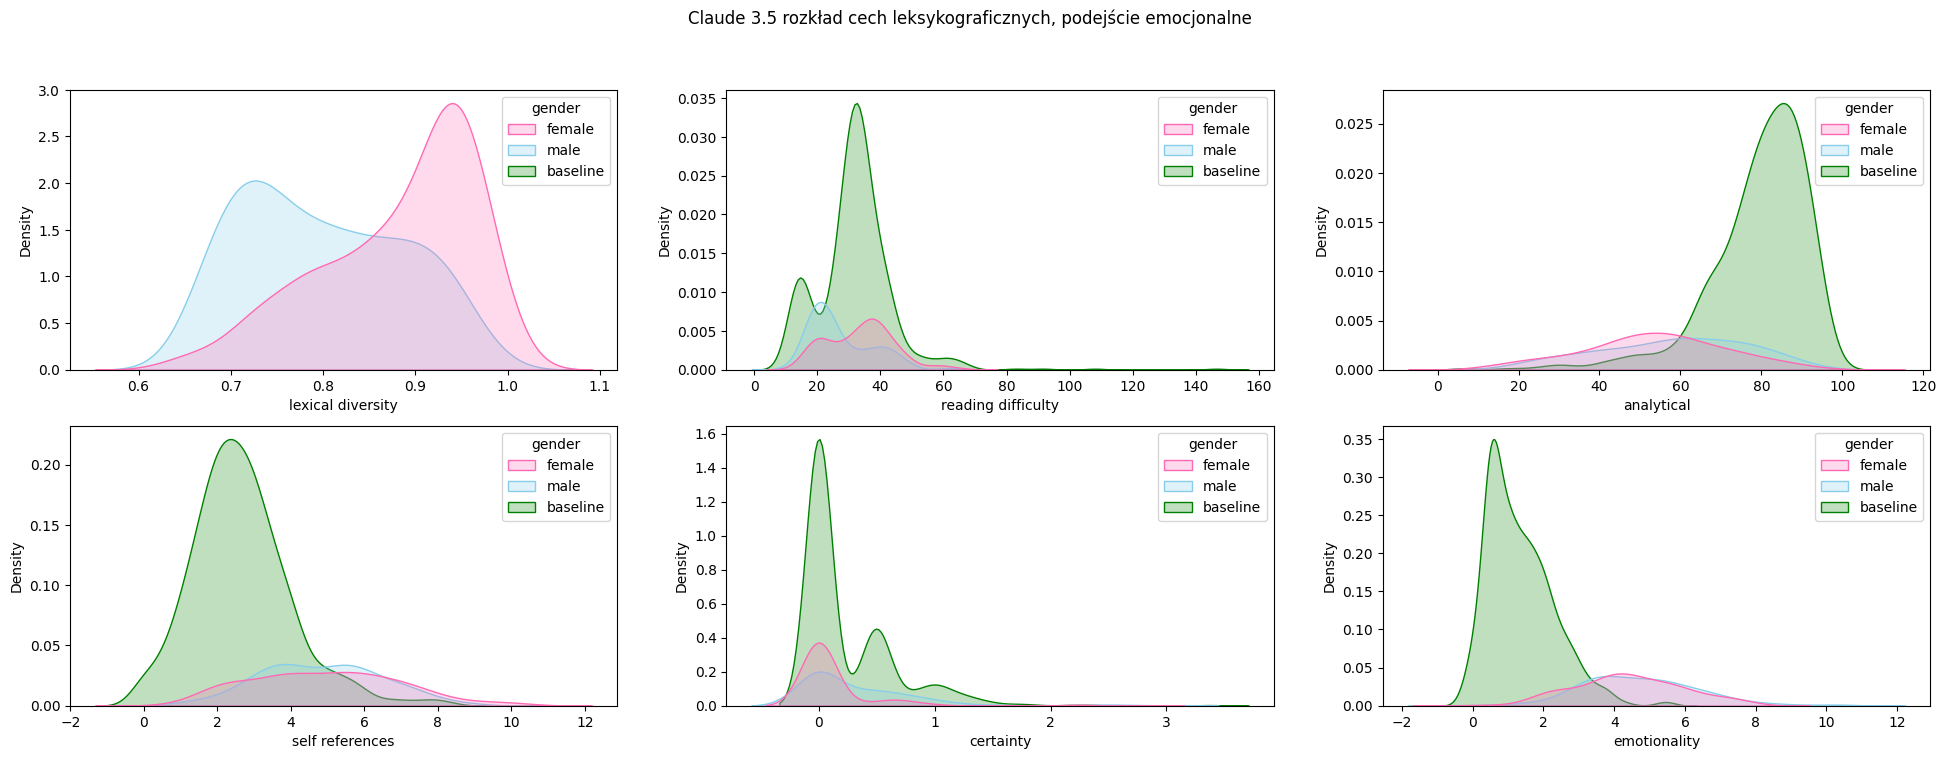

In [ ]:
emotional = df[df["type"] == "emotional"]
baseline["gender"] = "baseline"
emotional = pd.concat([emotional, baseline], ignore_index=True)
fig, ax = plt.subplots(2, 3, figsize=(24, 8))
for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    print(measure)
    print(
        wilcoxon(
            emotional[emotional["gender"] == "male"][measure],
            emotional[emotional["gender"] == "female"][measure],
        )
    )
    sns.kdeplot(
        emotional, x=measure, hue="gender", palette=gender_colormap, ax=ax[i // 3, i % 3], fill=True
    )
plt.suptitle("Claude 3.5 rozkład cech leksykograficznych, podejście emocjonalne")
plt.show()

lexical diversity
WilcoxonResult(statistic=np.float64(1725.5), pvalue=np.float64(2.50077301789404e-13))
reading difficulty
WilcoxonResult(statistic=np.float64(3484.0), pvalue=np.float64(0.0007986058001835396))
analytical
WilcoxonResult(statistic=np.float64(1367.0), pvalue=np.float64(7.667596182220416e-16))
self references
WilcoxonResult(statistic=np.float64(4415.0), pvalue=np.float64(0.026282678235823087))
certainty
WilcoxonResult(statistic=np.float64(406.0), pvalue=np.float64(0.5693938070230591))
emotionality
WilcoxonResult(statistic=np.float64(296.0), pvalue=np.float64(7.584601458190633e-24))


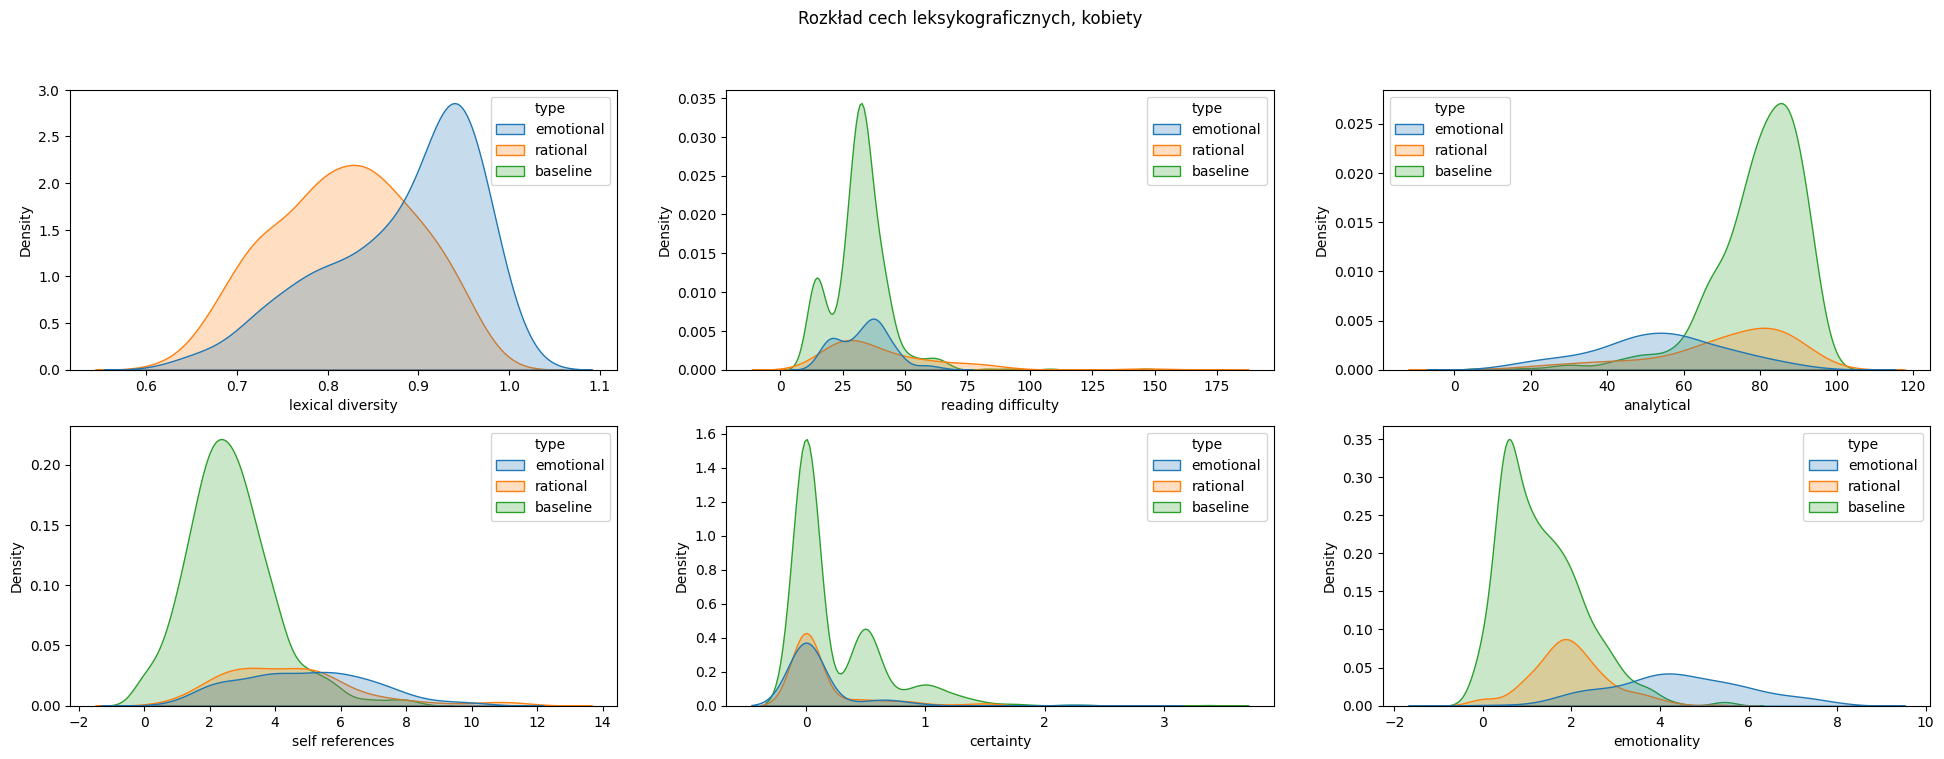

In [ ]:
female = df[df["gender"] == "female"]
baseline["type"] = "baseline"
female = pd.concat([female, baseline], ignore_index=True)
fig, axes = plt.subplots(2, 3, figsize=(24, 8))
for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    print(measure)
    print(
        wilcoxon(
            female[female["type"] == "rational"][measure],
            female[female["type"] == "emotional"][measure],
        )
    )
    sns.kdeplot(female, x=measure, hue="type", fill=True, ax=axes[i // 3, i % 3])
plt.suptitle("Rozkład cech leksykograficznych, kobiety")
plt.show()

lexical diversity
WilcoxonResult(statistic=np.float64(2643.0), pvalue=np.float64(2.4036543395934476e-08))
reading difficulty
WilcoxonResult(statistic=np.float64(4978.0), pvalue=np.float64(0.24806517795163052))
analytical
WilcoxonResult(statistic=np.float64(1350.5), pvalue=np.float64(5.949440893895035e-16))
self references
WilcoxonResult(statistic=np.float64(3523.0), pvalue=np.float64(5.9642559536579914e-05))
certainty
WilcoxonResult(statistic=np.float64(1661.0), pvalue=np.float64(0.04445882309379414))
emotionality
WilcoxonResult(statistic=np.float64(204.5), pvalue=np.float64(1.3051218187420348e-24))


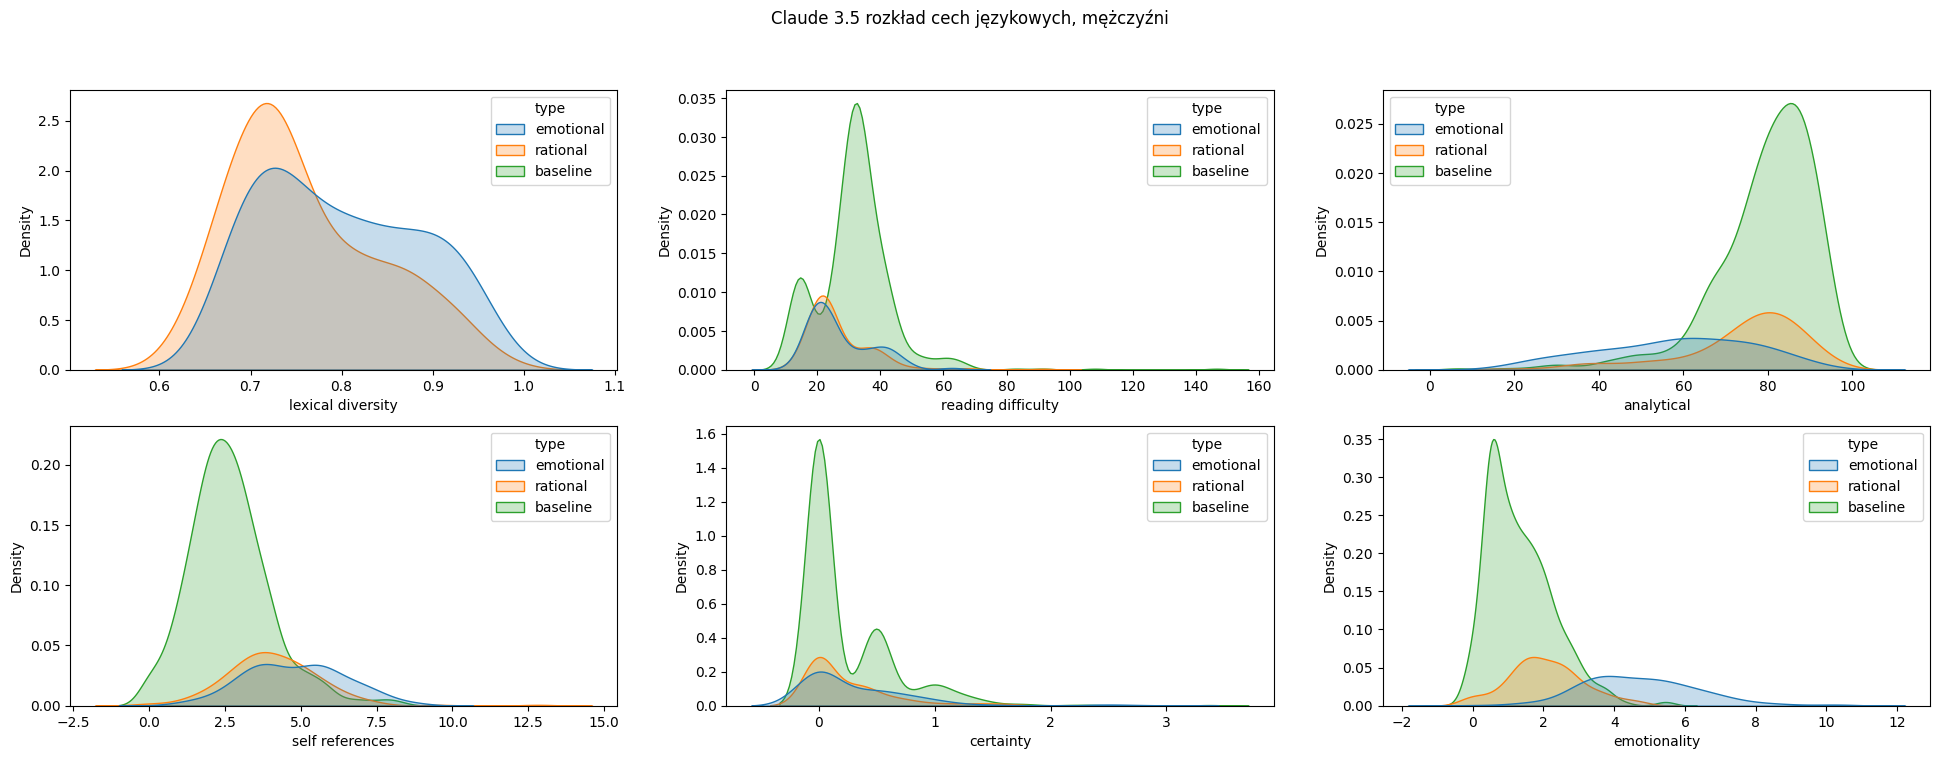

In [ ]:
female = df[df["gender"] == "male"]
baseline["type"] = "baseline"
female = pd.concat([female, baseline], ignore_index=True)
fig, axes = plt.subplots(2, 3, figsize=(24, 8))
for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    print(measure)
    print(
        wilcoxon(
            female[female["type"] == "rational"][measure],
            female[female["type"] == "emotional"][measure],
        )
    )
    sns.kdeplot(female, x=measure, hue="type", fill=True, ax=axes[i // 3, i % 3])
plt.suptitle("Claude 3.5 rozkład cech językowych, mężczyźni")
plt.show()

# wnioski:
- baseline różni się pod wieloma względami od poszczególnych typów zapytań
- odpowiedź baselineowa modelu do kobiet i mężczyzn jest bardziej podobna do racjonalnej niż emocjonalnej
- llm próbując emocjonalnie przekonać kobiety używa trudniejszych słów niż w stosunku do mężczyzn


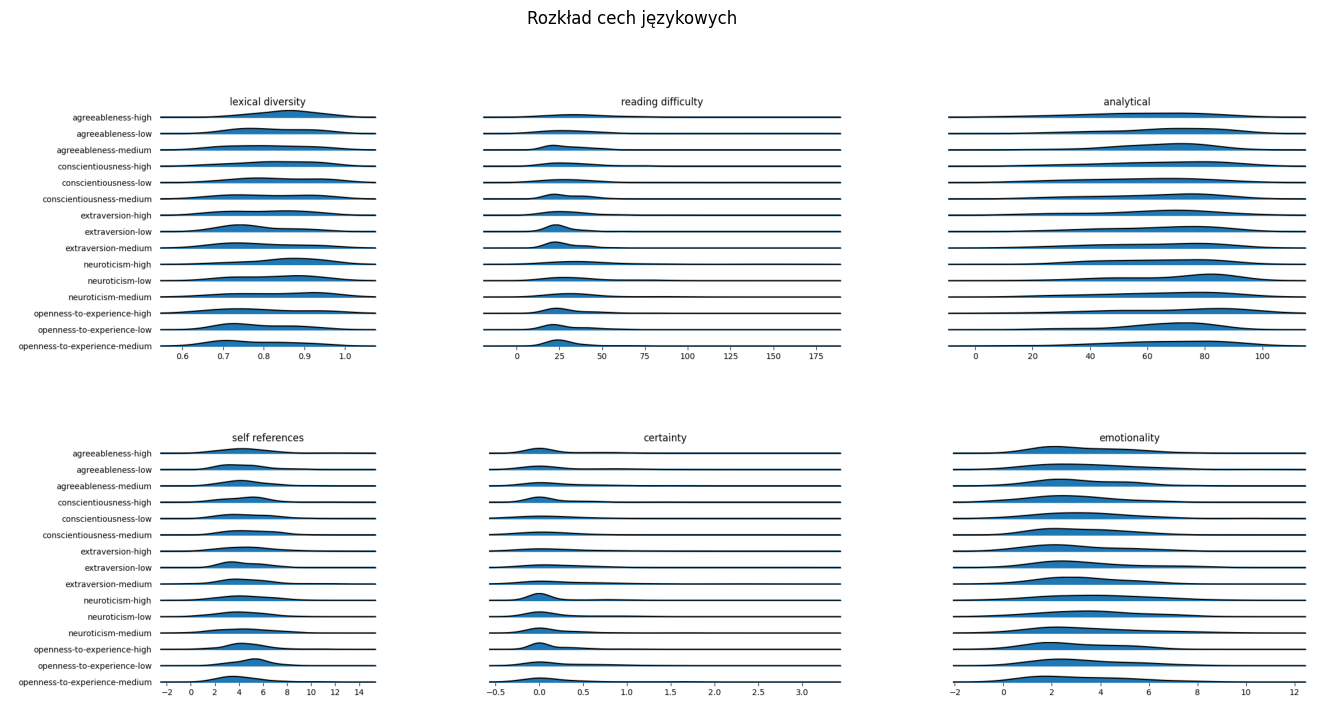

In [ ]:
df["temp"] = df["trait"].str.replace(" ", "-") + "-" + df["level"]
images = []
for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    fig, axes = joypy.joyplot(df, by="temp", column=measure)
    if i % 3 != 0:
        for a in axes:
            a.set_yticklabels([])
            a.set_yticks([])
    plt.title(measure)
    buf = BytesIO()
    plt.tight_layout(pad=1.0)
    plt.savefig(buf, format="png")
    buf.seek(0)
    img = Image.open(buf)
    images.append(img)
    plt.close()

fig, ax = plt.subplots(2, 3, figsize=(24, 8))
plt.suptitle("Rozkład cech językowych")
for a, img in zip(ax.flatten(), images):
    a.imshow(img)
    a.axis("off")
plt.subplots_adjust(wspace=-0.5)
plt.show()

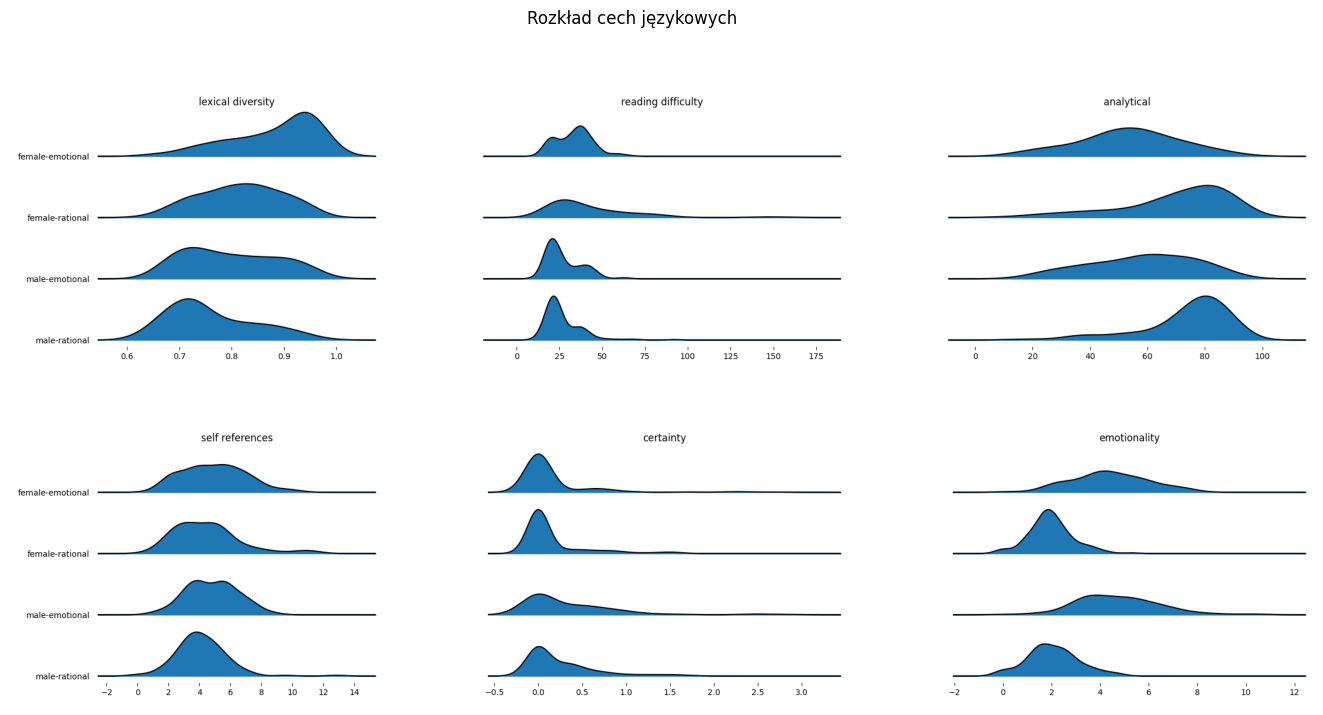

In [ ]:
df["temp"] = df["gender"] + "-" + df["type"]
images = []
for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    fig, axes = joypy.joyplot(df, by="temp", column=measure)
    plt.title(measure)
    if i % 3 != 0:
        for a in axes:
            a.set_yticklabels([])
            a.set_yticks([])
    plt.title(measure)
    buf = BytesIO()
    plt.tight_layout(pad=1.0)
    plt.savefig(buf, format="png")
    buf.seek(0)
    img = Image.open(buf)
    images.append(img)
    plt.close()

fig, ax = plt.subplots(2, 3, figsize=(24, 8))
plt.suptitle("Rozkład cech językowych")
for a, img in zip(ax.flatten(), images):
    a.imshow(img)
    a.axis("off")
plt.subplots_adjust(wspace=-0.5)
plt.show()